# 12 Steps to Navier-Stokes
---

## Step 1: 1-D Linear Convection

The 1-D Linear Convection equation:

$$
\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0
$$

After discretizing the equation, solving for unknown to advance in time:

$$
u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x} \left( u_i^n - u_{i-1}^n \right)
$$

In [15]:
import numpy
from matplotlib import pyplot
import time, sys

In [16]:
%matplotlib inline

In [17]:
nx = 41         # No. of points in grid
dx = 2 / (nx-1) # Length of each spacial step
nt = 25         # No. of points in time
dt = .025       # Duration of each time step
c  = 1          # Speed of the wave

In [18]:
u = numpy.ones(nx)
u[int(.5/dx): int(1/dx + 1)] = 2 # Initial condition of u = 2 b/w 0.5 and 1
print(u)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


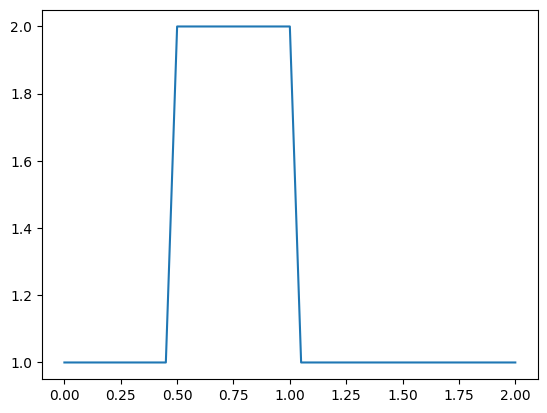

In [19]:
pyplot.plot(numpy.linspace(0, 2, nx), u)

In [20]:
un = numpy.ones(nx) # Temporary array to store solution of u for next time step
for n in range(nt):
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])

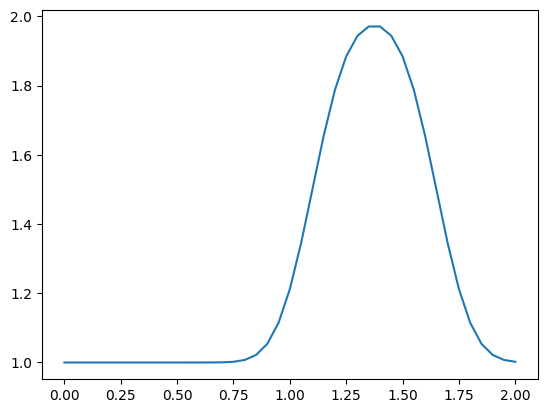

In [21]:
pyplot.plot(numpy.linspace(0, 2, nx), u);

## Step 2: Nonlinear convection

The Nonlinear equation, where constant c is replaced by u:

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0
$$

Hence, solving for unknown after discretization gives:

$$
u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} \left( u_i^n - u_{i-1}^n \right)
$$

In [22]:
import numpy 
from matplotlib import pyplot
%matplotlib inline

nx = 41
dx = 2 / (nx-1)
nt = 25
dt = 0.025

u = numpy.ones(nx)
u[int(.5/dx): int(1/dx + 1)] = 2

un = numpy.ones(nx)

In [23]:
for n in range(nt):
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])

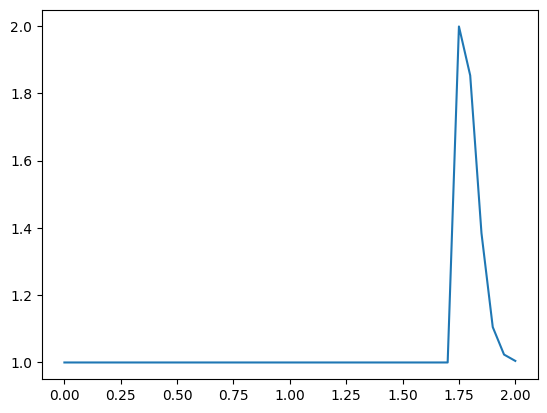

In [24]:
pyplot.plot(numpy.linspace(0, 2, nx), u)

### Convergence and the CFL Condition

As we adjust the grid size, initially the numerical diffusion reduces and the pattern approaches a square wave, however later it doesn't look anything like the original hat function

In [25]:
import numpy                 
from matplotlib import pyplot    
%matplotlib inline

def linearconv(nx):
    dx = 2 / (nx - 1)
    nt = 20    #nt is the number of timesteps we want to calculate
    dt = .025  #dt is the amount of time each timestep covers (delta t)
    c = 1

    u = numpy.ones(nx)      #defining a numpy array which is nx elements long with every value equal to 1.
    u[int(.5/dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s

    un = numpy.ones(nx) #initializing our placeholder array, un, to hold the values we calculate for the n+1 timestep

    for n in range(nt):  #iterate through time
        un = u.copy() ##copy the existing values of u into un
        for i in range(1, nx):
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
        
    pyplot.plot(numpy.linspace(0, 2, nx), u);

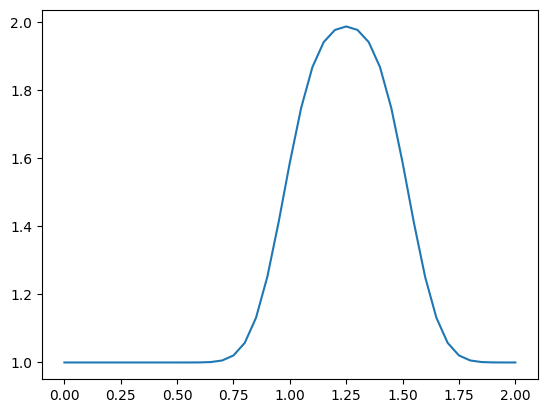

In [26]:
linearconv(41)

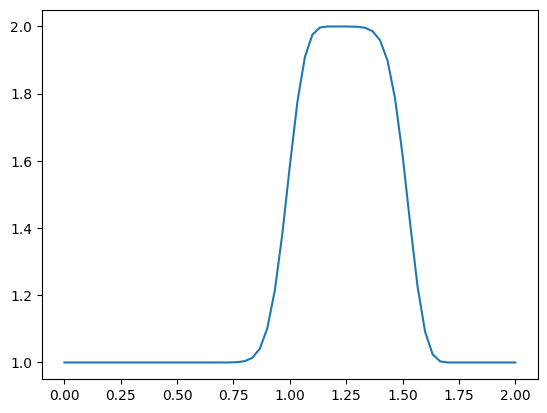

In [27]:
linearconv(61)

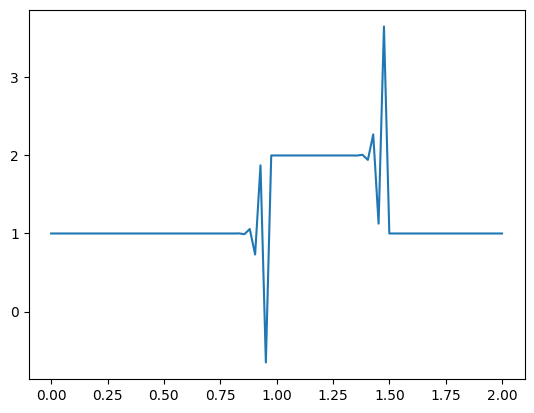

In [28]:
linearconv(85)

The code calculates the speed of the wave at each of th epoints x. In the last plot, the wave travels a distance more then dx over the time $\Delta t$. Stability can be enforced if $\Delta t$ step size is calculated with respect to dx rather than being independent.

$$
\sigma = \frac{u \Delta t}{\Delta x} \le \sigma_{max}
$$

where u is the speed of the wave, $\sigma$ is called the **Courant Number** and the value of $\sigma_{max}$ that will ensure stability depends on the discretization used.

In [29]:
import numpy
from matplotlib import pyplot

def linearconv(nx):
    dx = 2 / (nx - 1)
    nt = 20    
    c = 1
    sigma = .5
    
    dt = sigma * dx

    u = numpy.ones(nx) 
    u[int(.5/dx):int(1 / dx + 1)] = 2

    un = numpy.ones(nx)

    for n in range(nt):  
        un = u.copy() 
        for i in range(1, nx):
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
        
    pyplot.plot(numpy.linspace(0, 2, nx), u)

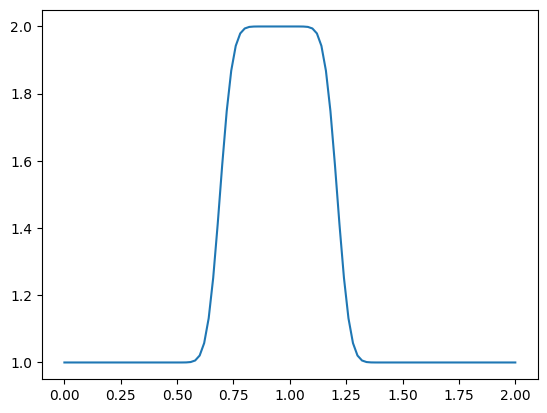

In [30]:
linearconv(101)

## Step 3: Diffusion Equation in 1-D

the one-dimensional diffusion equation is:

$$
\frac{\partial u}{\partial t} = v \frac{\partial^2 u}{\partial x^2}
$$

Unlike the first two equations, this has a second-order derivative.

### Discretizing $\frac{\partial^2 u}{\partial^2 x}$

The second-order derivative can be represented geometrically as the line tangent to the curve given by the first derivative. We will discretize the second-order derivative with a Central Difference scheme: a combination of Forward Difference and Backward Difference of the first derivative. Consider the Taylor expansion of $u_{i+1}$ and $u_{i-1}$ around $u_i$:

$$
u_{i+1} = u_i + \Delta x \left.\frac{\partial u}{\partial x} \right |_i + \frac{\Delta x^2}{2} \left.\frac{\partial^2 u}{\partial^2 x} \right |_i + \frac{\Delta x^3}{3!} \left.\frac{\partial^3 u}{\partial^3 x} \right |_i + O(\Delta x^4)
$$

$$
u_{i-1} = u_i - \Delta x \left.\frac{\partial u}{\partial x} \right |_i + \frac{\Delta x^2}{2} \left.\frac{\partial^2 u}{\partial^2 x} \right |_i - \frac{\Delta x^3}{3!} \left.\frac{\partial^3 u}{\partial^3 x} \right |_i + O(\Delta x^4)
$$

When we add the two expansions, the odd-numbered derivatives cancel each other out. If we neglect any terms of $O(x^4)$ or higher (which are negligible), we can rearrange the sum to solve for our second-order derivative.

$$
u_{i+1} + u_{i-1} = 2u_i + \Delta x^2 \left.\frac{\partial^2 u}{\partial^2 x} \right |_i + O(\Delta x^4)
$$

$$
\frac{\partial^2 u}{\partial^2 x} = \frac{u_{i+1} - 2u_i + u_{i-1}}{\Delta x^2} + O(\Delta x^4)
$$


### Returning to Step 3
We can now write the discretized diffusion equation in 1D:

$$
\frac{u_i^{n+1} - u_i^n}{\Delta t} = v \frac{u_{i+1} - 2u_i + u_{i-1}}{\Delta x^2}
$$

As before, once we have an inital condition there is only one unknown to solve for:

$$
u_i^{n+1} = u_i^n + \frac{v\Delta t}{\Delta x^2} (u_{i+1} - 2u_i + u_{i-1})
$$

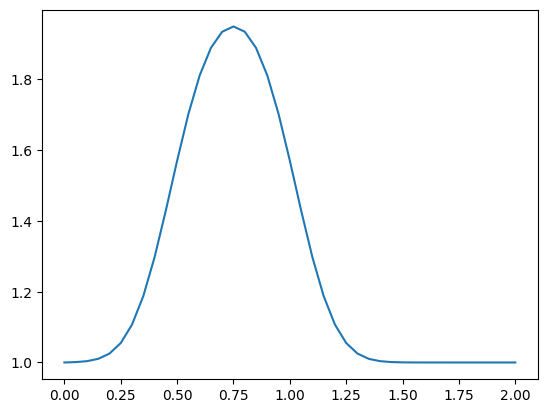

In [31]:
import numpy 
from matplotlib import pyplot
%matplotlib inline

nx = 41
dx = 2 / (nx-1)
nt = 20
nu = 0.3  # The value of viscosity
sigma = .2
dt = sigma * dx**2 / nu


u = numpy.ones(nx)
u[int(.5/dx): int(1/dx + 1)] = 2

un = numpy.ones(nx)

for n in range(nt):
    un = u.copy()
    for i in range(1, nx-1):
        u[i] = un[i] + nu * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1])

pyplot.plot(numpy.linspace(0, 2, nx), u);

## Step 4: Burgers' Equation

Burgers' Equation in one spatial dimension:

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = v \frac{\partial^2 u}{\partial x^2}
$$

Which is a combination of non-linear convection and diffusion. After discretizing and solving for the unknown:

$$
u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n) + v \frac{\Delta t}{\Delta x^2} (u_{i+1}^{n} - 2u_i^n + u_{i-1}^n)
$$



### Initial and Boundary Conditions

Initial condition for this problem:

$$
u = - \frac{2v}{\phi} \frac{\partial\phi}{\partial x} + 4
$$

$$
\phi = exp(\frac{-x^2}{4v}) + exp(\frac{-(x-2\pi)^2}{4v})
$$

which has an analytical solution given by:

$$
u = - \frac{2v}{\phi} \frac{\partial\phi}{\partial x} + 4
$$

$$
\phi = exp(\frac{-(x-4t)^2}{4v(t+1)}) + exp(\frac{-(x-4t-2\pi)^2}{4v(t+1)})
$$

and the periodic boundary condition will be:

$$
u(0) = u(2\pi)
$$ 

### Using SymPy Library
SymPy is the symbolic math library for python, which will be used to evaluate this problem conveniently.

In [41]:
import numpy
import sympy
from sympy import init_printing
init_printing(use_latex=True)

In [42]:
x, nu, t = sympy.symbols('x nu t')
phi = (sympy.exp(-(x - 4 * t)**2 / (4 * nu * (t + 1))) + \
       sympy.exp(-(x - 4 * t - 2 * sympy.pi)**2 / (4 * nu * (t + 1))))
phi

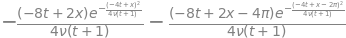

In [43]:
phiprime = phi.diff(x)
phiprime

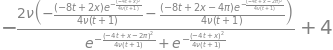

In [44]:
from sympy.utilities.lambdify import lambdify

u = -2 * nu * (phiprime / phi) + 4
u

In [45]:
ufunc = lambdify((t, x, nu), u)
ufunc(1, 4, 3)

In [46]:
from matplotlib import pyplot
%matplotlib inline

nx = 101
nt = 100
dx = 2 * numpy.pi / (nx - 1)
nu = .07
dt = dx * nu

x = numpy.linspace(0, 2 * numpy.pi, nx)
un = numpy.empty(nx)
t = 0

u = numpy.asarray([ufunc(t, x0, nu) for x0 in x])
u

array([4.        , 4.06283185, 4.12566371, 4.18849556, 4.25132741,
       4.31415927, 4.37699112, 4.43982297, 4.50265482, 4.56548668,
       4.62831853, 4.69115038, 4.75398224, 4.81681409, 4.87964594,
       4.9424778 , 5.00530965, 5.0681415 , 5.13097336, 5.19380521,
       5.25663706, 5.31946891, 5.38230077, 5.44513262, 5.50796447,
       5.57079633, 5.63362818, 5.69646003, 5.75929189, 5.82212374,
       5.88495559, 5.94778745, 6.0106193 , 6.07345115, 6.136283  ,
       6.19911486, 6.26194671, 6.32477856, 6.38761042, 6.45044227,
       6.51327412, 6.57610598, 6.63893783, 6.70176967, 6.76460125,
       6.82742866, 6.89018589, 6.95176632, 6.99367964, 6.72527549,
       4.        , 1.27472451, 1.00632036, 1.04823368, 1.10981411,
       1.17257134, 1.23539875, 1.29823033, 1.36106217, 1.42389402,
       1.48672588, 1.54955773, 1.61238958, 1.67522144, 1.73805329,
       1.80088514, 1.863717  , 1.92654885, 1.9893807 , 2.05221255,
       2.11504441, 2.17787626, 2.24070811, 2.30353997, 2.36637

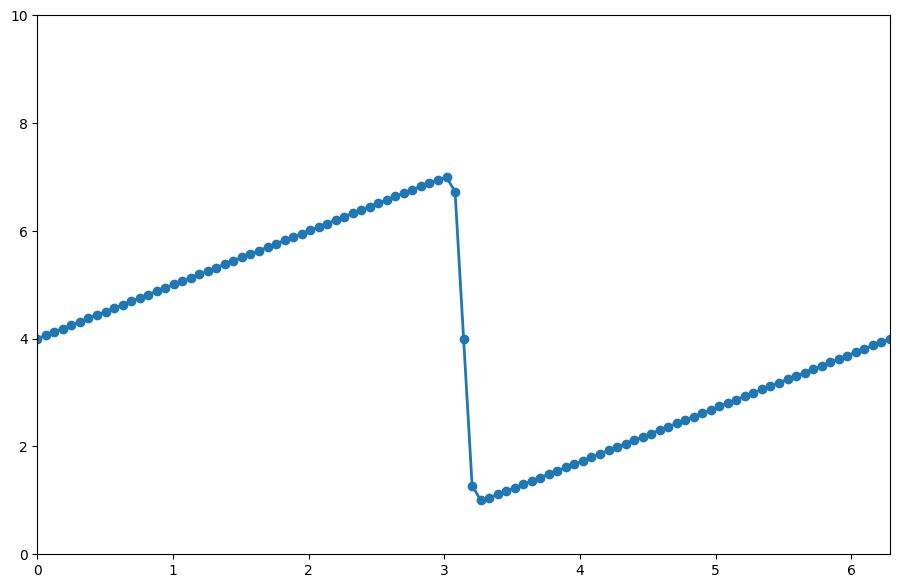

In [47]:
pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.plot(x, u, marker='o', lw=2)
pyplot.xlim([0, 2 * numpy.pi])
pyplot.ylim([0, 10]);

In [48]:
for n in range(nt):
    un = u.copy()
    for i in range(1, nx-1):
        u[i] = un[i] - un[i] * dt / dx *(un[i] - un[i-1]) + nu * dt / dx**2 *\
                (un[i+1] - 2 * un[i] + un[i-1])
    u[0] = un[0] - un[0] * dt / dx * (un[0] - un[-2]) + nu * dt / dx**2 *\
                (un[1] - 2 * un[0] + un[-2])
    u[-1] = u[0]
        
u_analytical = numpy.asarray([ufunc(nt * dt, xi, nu) for xi in x])

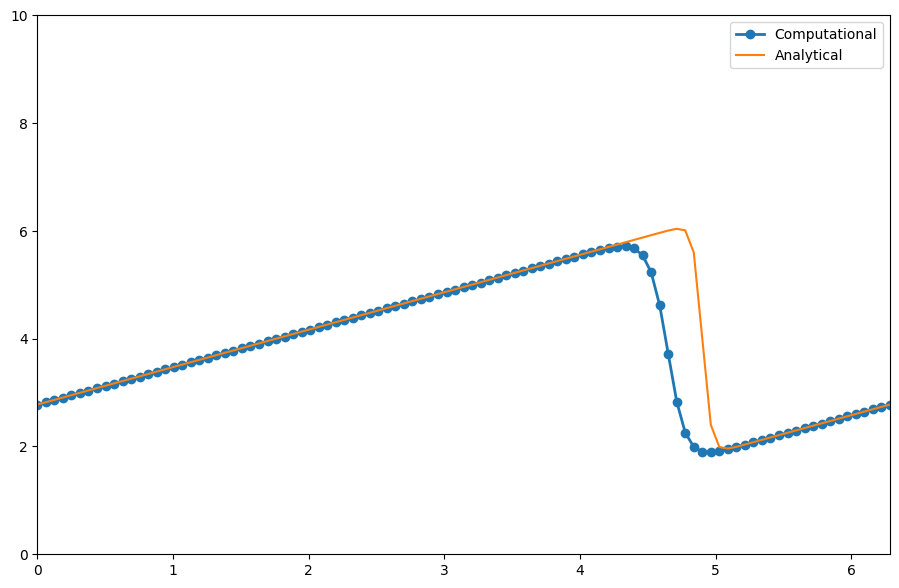

In [49]:
pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.plot(x,u, marker='o', lw=2, label='Computational')
pyplot.plot(x, u_analytical, label='Analytical')
pyplot.xlim([0, 2 * numpy.pi])
pyplot.ylim([0, 10])
pyplot.legend();

## Step 5: 2-D Linear Convection

The PDE governing 2-D Linear convection is:

$$
\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} + c \frac{\partial u}{\partial y} = 0
$$

With 1-D implementations, we used $i$ subscripts to denote movement in space. For 2-D, we will use $i$ as the index for $x$ values, and and use $j$ for $y$ values.

As before, discretizing and solving for the unknown gives:

$$
u_{i,j}^{n+1} = u_{i,j}^n - c \frac{\Delta t}{\Delta x} (u_{i,j}^n - u_{i-1, j}^n) - c \frac{\Delta t}{\Delta y} (u_{i,j}^n - u_{i, j-1}^n)
$$

The initial conditions are:

$$
u(x,y) = \begin{cases}
2 & \text{for } 0.5 \le x, y \le 1 \\
1 & \text{for everywhere else} 
\end{cases}
$$

and boundary conditions are:

$$
u = 1 \text{ for} \begin{cases}
x = 0,2 \\
y = 0,2 
\end{cases}

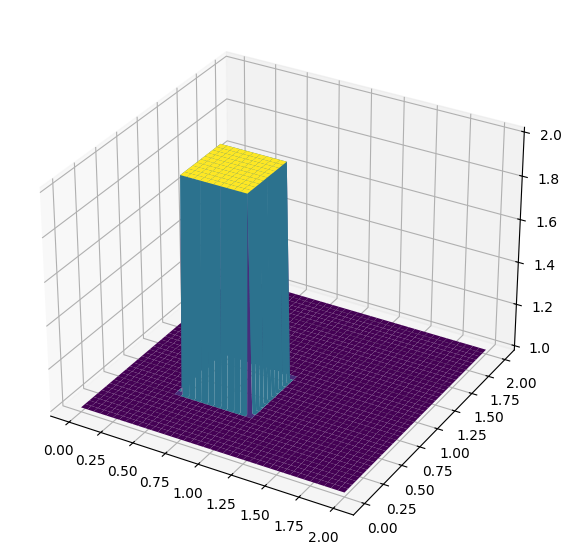

In [8]:
from mpl_toolkits.mplot3d import Axes3D

import numpy
from matplotlib import pyplot, cm
%matplotlib inline

nx = 81
ny = 81
nt = 100
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx))
un = numpy.ones((ny, nx))

u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(projection='3d')                      
X, Y = numpy.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)


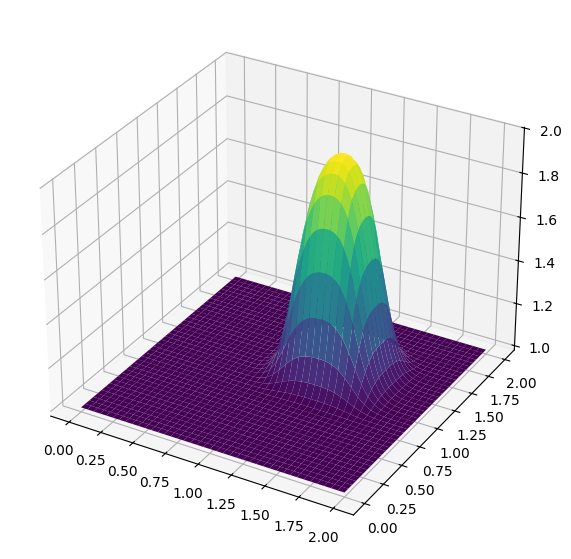

In [9]:
for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    u[1:, 1:] = (un[1:, 1:] - (c * dt / dx * (un[1:, 1:] - un[1:, :-1])) -
                              (c * dt / dy * (un[1:, 1:] - un[:-1, 1:])))
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(projection='3d')                      
X, Y = numpy.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

## Step 6: 2-D Convection
2-D Convection is governed by the following pair of coupled partial differential equations:

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = 0
$$

$$
\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = 0
$$

and similarly discretizing and solving for unknown yields:

$$
u_{i,j}^{n+1} = u_{i,j}^n - u_{i,j}^n \frac{\Delta t}{\Delta x} (u_{i,j}^n - u_{i-1, j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (u_{i,j}^n - u_{i, j-1}^n)
$$

$$
v_{i,j}^{n+1} = v_{i,j}^n - u_{i,j}^n \frac{\Delta t}{\Delta x} (v_{i,j}^n - v_{i-1, j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (v_{i,j}^n - v_{i, j-1}^n)
$$

The initial condition is the same as applied for 1-D in both the x and y directions:

$$
u, v = \begin{cases}
2 & \text{for } x, y \in (0.5, 1) \times (0.5, 1) \\
1 & \text{for everywhere else} 
\end{cases}
$$

The boundary condition:

$$
u = 1, v = 1 \text{ for } \begin{cases}
x = 0, 2 \\
y = 0, 2 \end{cases}
$$

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot, cm
import numpy
%matplotlib inline

In [5]:
nx, ny = 101, 101
nt = 80
c = 1
dx, dy = 2/(nx-1), 2/(ny-1)
sigma = .2
dt = sigma * dx

x, y = numpy.linspace(0, 2, nx), numpy.linspace(0, 2, ny)

u, v, un, vn = numpy.ones((ny, nx)), numpy.ones((ny, nx)), numpy.ones((ny, nx)), numpy.ones((ny, nx))

u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

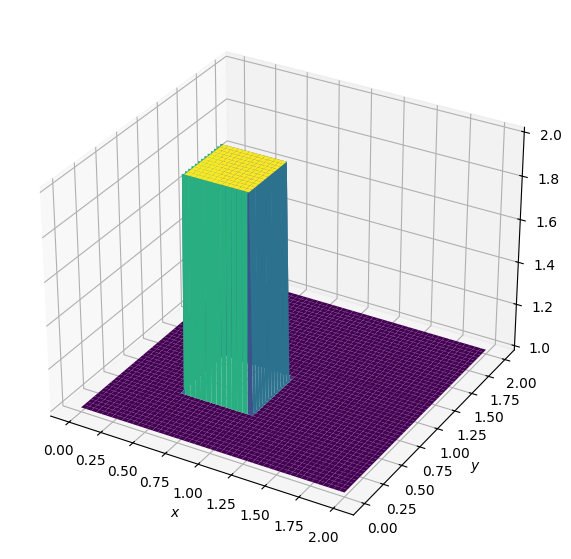

In [6]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(projection='3d')
X, Y = numpy.meshgrid(x, y)

ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [7]:
for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    vn = v.copy()
    u[1:, 1:] = (un[1:, 1:] - 
                 (un[1:, 1:] * c * dt / dx * (un[1:, 1:] - un[1:, :-1])) -
                  vn[1:, 1:] * c * dt / dy * (un[1:, 1:] - un[:-1, 1:]))
    v[1:, 1:] = (vn[1:, 1:] -
                 (un[1:, 1:] * c * dt / dx * (vn[1:, 1:] - vn[1:, :-1])) -
                 vn[1:, 1:] * c * dt / dy * (vn[1:, 1:] - vn[:-1, 1:]))
    
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1

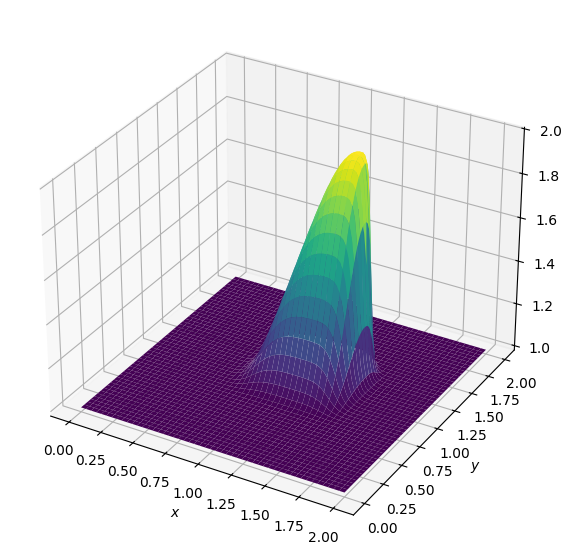

In [8]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(projection='3d')
X, Y = numpy.meshgrid(x, y)

ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

## Step 7: 2-D Diffusion

The 2-D Diffusion equation:

$$
\frac{\partial u}{\partial t} = v \frac{\partial^2 u}{\partial x^2} + v \frac{\partial^2 u}{\partial y^2}
$$

once again after discretizing we get:

$$
u_{i, j}^{n+1} = u_{i, j}^n + v\frac{\Delta t}{\Delta x^2}(u_{i+1, j}^{n} - 2 u_{i, j}^{n} + u_{i-1, j}^{n}) + v\frac{\Delta t}{\Delta y^2}(u_{i, j+1}^{n} - 2 u_{i, j}^{n} + u_{i, j-1}^{n})
$$

In [8]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [9]:
nx = 31
ny = 31
nt = 17
nu = .05
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .25
dt = sigma * dx * dy / nu

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx))  
un = numpy.ones((ny, nx))

u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2  

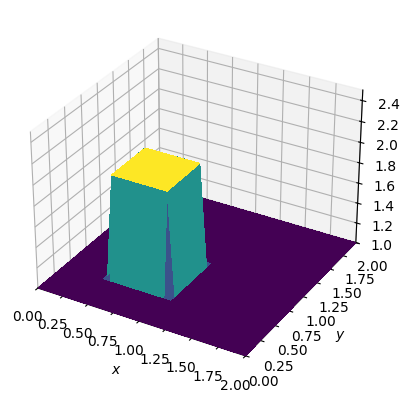

In [10]:
fig = pyplot.figure()
ax = fig.add_subplot(projection='3d')
X, Y = numpy.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_zlim(1, 2.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [11]:
def diffuse(nt):
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2  
    
    for n in range(nt + 1): 
        un = u.copy()
        u[1:-1, 1:-1] = (un[1:-1,1:-1] + 
                        nu * dt / dx**2 * 
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                        nu * dt / dy**2 * 
                        (un[2:,1: -1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1

    
    fig = pyplot.figure()
    ax = fig.add_subplot(projection='3d')
    surf = ax.plot_surface(X, Y, u[:], rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=True)
    ax.set_zlim(1, 2.5)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$');

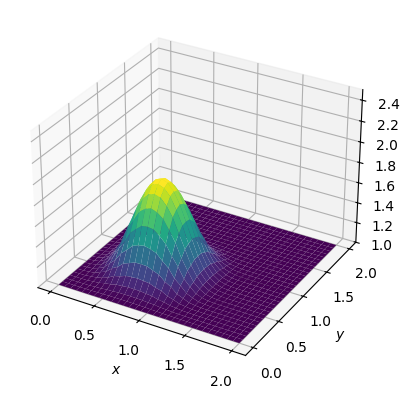

In [12]:
diffuse(10)

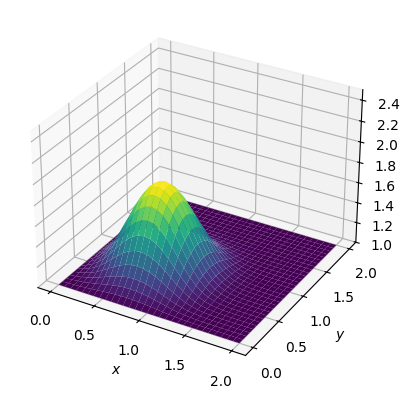

In [13]:
diffuse(14)

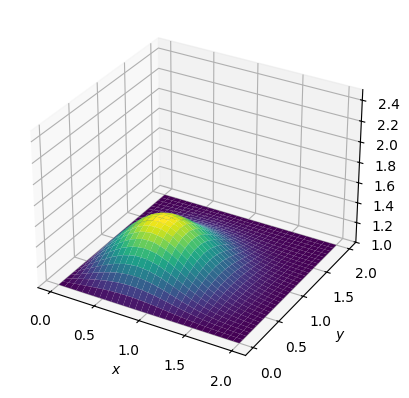

In [14]:
diffuse(50)